In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.helper_functions import calculate_cbtmin, calculate_sleep_onset, calculate_sleep_duration

In [29]:
figsize = (8, 4)
title_fontsize = 20
tick_label_fontsize = 14
legend_fontsize = 14
axis_label_fontsize = 16
text_fontsize = 18

In [30]:
lights_on_start_times = [5, 6, 7, 8, 9]
data_path = 'data/different_initial_conditions'

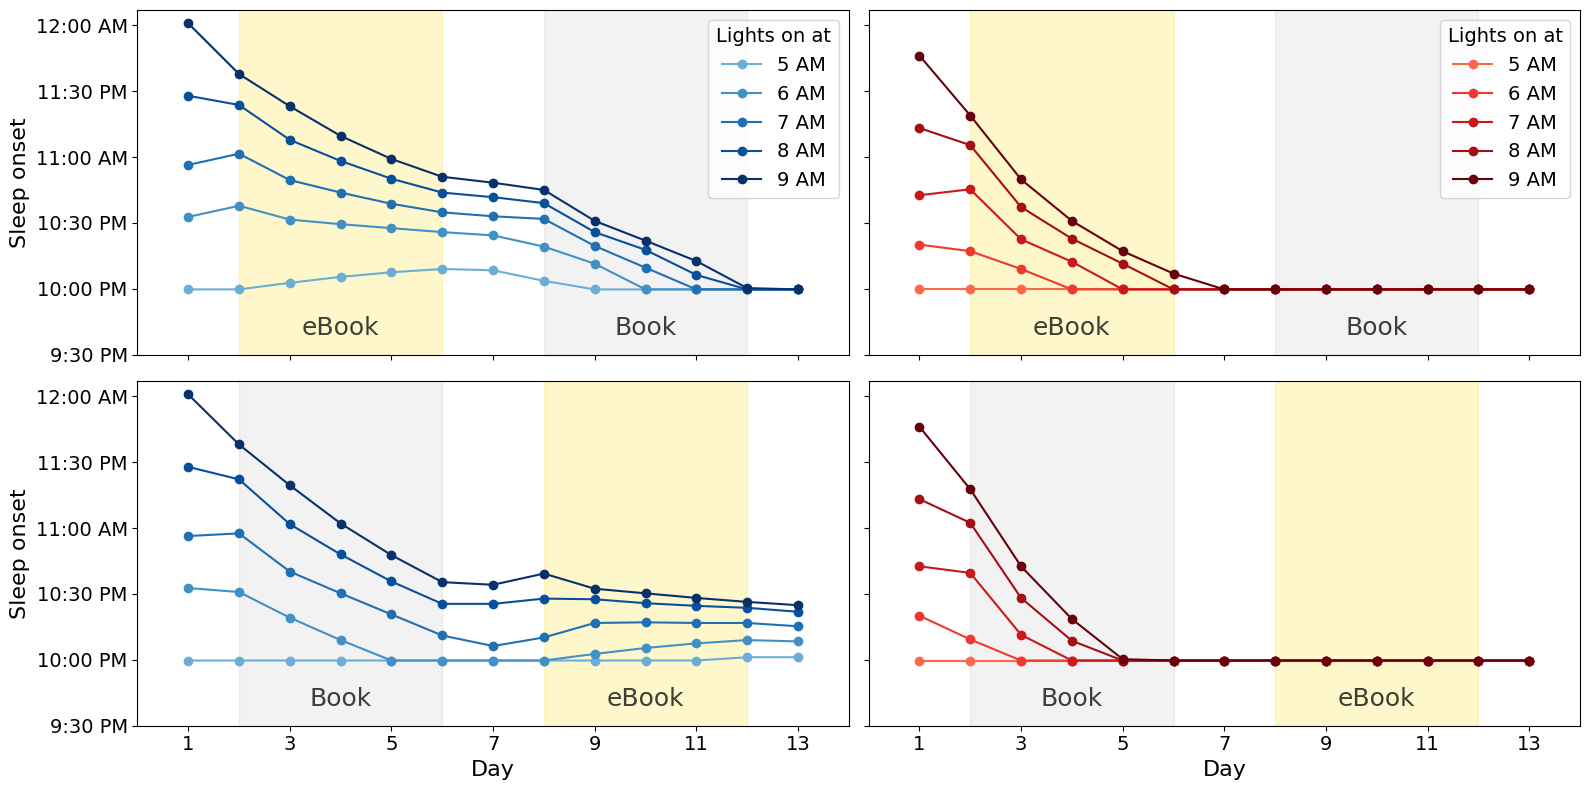

In [ ]:
colors_low = plt.get_cmap('Blues')(np.linspace(0.5, 1, len(lights_on_start_times)))
colors_high = plt.get_cmap('Reds')(np.linspace(0.5, 1, len(lights_on_start_times)))

low_baseline_conditions = [
    'chang14_ebook_first', 'chang14_ebook_second',
]
high_baseline_conditions = [
    'chang14_high_ebook_first', 'chang14_high_ebook_second',
]

fig, axs = plt.subplots(2, 2, figsize=(figsize[0]*2, figsize[1]*2), sharey=True, sharex=True)

for idx, lights_on in enumerate(lights_on_start_times):
    data = np.load(f"{data_path}/different_initial_conditions_{lights_on}_lights_on.npz")
    time = data['time']

    # Calculate sleep onset time
    for jdx, condition in enumerate(low_baseline_conditions):
        sleep_onset = calculate_sleep_onset(time, data, condition)
        days = np.arange(1, len(sleep_onset) + 1)
        normalized_sleep_onset = sleep_onset - days * 24 + 24
        axs[jdx, 0].plot(days, normalized_sleep_onset,
                    marker='o', color=colors_low[idx],
                    label=f'{lights_on} AM',)
        axs[jdx, 0].set_xlim(0, 14)

    for jdx, condition in enumerate(high_baseline_conditions):
        sleep_onset = calculate_sleep_onset(time, data, condition)
        days = np.arange(1, len(sleep_onset) + 1)
        normalized_sleep_onset = sleep_onset - days * 24 + 24
        axs[jdx, 1].plot(days, normalized_sleep_onset,
                    marker='o', color=colors_high[idx],
                    label=f'{lights_on} AM',)
        axs[jdx, 1].set_xlim(0, 14)

for i in range(2):
    axs[0, i].axvspan(2, 6, color='gold', alpha=0.2) # eBook
    axs[0, i].axvspan(8, 12, color='gray', alpha=0.1) # Book
    axs[1, i].axvspan(2, 6, color='gray', alpha=0.1)
    axs[1, i].axvspan(8, 12, color='gold', alpha=0.2)

axs[0, 0].set_xlim(0, 14)
axs[1, 1].set_xlim(0, 14)

axs[0, 0].legend(fontsize=legend_fontsize, title='Lights on at', title_fontsize=legend_fontsize)
axs[0, 1].legend(fontsize=legend_fontsize, title='Lights on at', title_fontsize=legend_fontsize)

axs[1, 0].set_xlabel('Day', fontsize=axis_label_fontsize)
axs[1, 1].set_xlabel('Day', fontsize=axis_label_fontsize)
axs[1, 0].set_xticks(days[::2])

axs[0, 0].set_yticks([21.5, 22, 22.5, 23, 23.5, 24])
axs[0, 0].set_yticklabels(['9:30 PM', '10:00 PM', '10:30 PM', '11:00 AM', '11:30 PM', '12:00 AM'],
                        fontsize=tick_label_fontsize)
axs[1, 0].set_yticks([21.5, 22, 22.5, 23, 23.5, 24])
axs[1, 0].set_yticklabels(['9:30 PM', '10:00 PM', '10:30 PM', '11:00 AM', '11:30 PM', '12:00 AM'],
                        fontsize=tick_label_fontsize)

axs[0, 0].set_ylabel('Sleep onset', fontsize=axis_label_fontsize)
axs[1, 0].set_ylabel('Sleep onset', fontsize=axis_label_fontsize)

axs[1, 0].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)
axs[1, 1].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

for i in range(2):
    axs[0, i].text(4, 21.7, 'eBook', horizontalalignment='center', verticalalignment='center',
                fontsize=text_fontsize, color='black', alpha=0.75)
    axs[0, i].text(10, 21.7, 'Book', horizontalalignment='center', verticalalignment='center',
                fontsize=text_fontsize, color='black', alpha=0.75)
    axs[1, i].text(4, 21.7, 'Book', horizontalalignment='center', verticalalignment='center',
                fontsize=text_fontsize, color='black', alpha=0.75)
    axs[1, i].text(10, 21.7, 'eBook', horizontalalignment='center', verticalalignment='center',
                fontsize=text_fontsize, color='black', alpha=0.75)

plt.tight_layout()
plt.show()